In [1]:
# ライブラリのインポート

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import math
from sklearn.linear_model import LinearRegression

print("libraries imported")

libraries imported


(10,)
(10,)


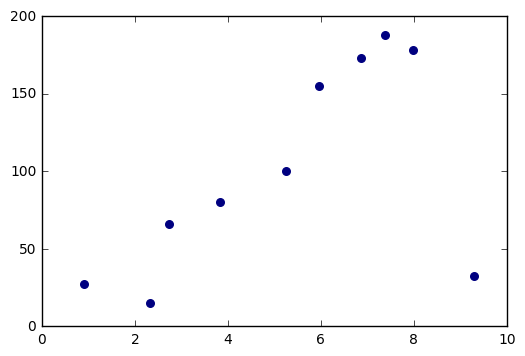

In [2]:
## 扱うデータ (x, y)
x = np.array([ 0.90909091,  2.32323232,  2.72727273,  3.83838384,  5.25252525,
        5.95959596,  6.86868687,  7.37373737,  7.97979798,  9.29292929])

y = np.array([  27.13657518,   14.89246315,   65.98961322,   80.57840846,
        100.50678496,  154.92689492,  173.1406391 ,  187.84441571,
        178.34266211,   32.3566994 ])

print(x.shape)
print(y.shape)

x_plot = np.linspace(0, 10, 100)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

plt.show()

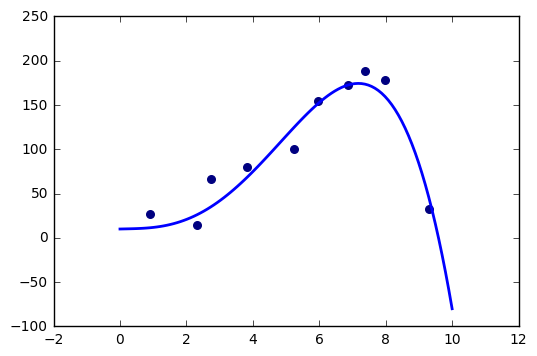

In [3]:
# 自分でフィットする関数を作ってみる
def predict(X):
    return [predict_point(x) for x in X]

# math.sin(x)を使わないでフィットする式を立ててみる
def predict_point(x):
    return 10 + x - x ** 2 + 2 * x**3 - 0.2 * x**4

plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

plt.show()

[ 26.30811735]


/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


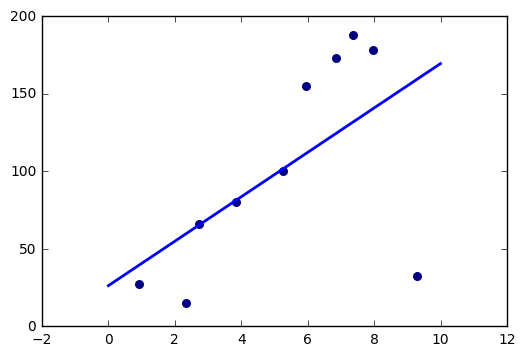

In [4]:
## 1次元の線形回帰
# create matrix versions of these arrays
X = x[:, np.newaxis]

reg = LinearRegression()
reg.fit(X, y)


## 予測
print(reg.predict([0]))

## Plot
plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = reg.predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

plt.show()

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[-78.2565694]


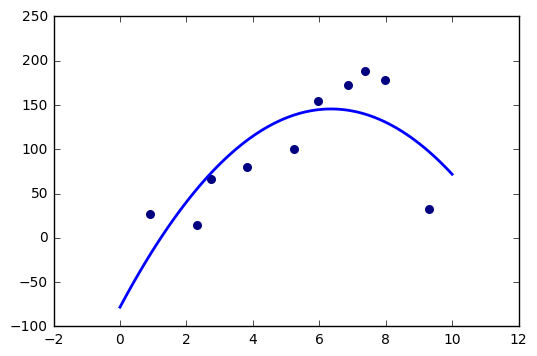

In [5]:
## 2次元の線形回帰
# create matrix versions of these arrays
X = x[:, np.newaxis]

## 高次元の特徴量を追加する。x*xを追加
reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
reg.fit(X, y)

## 予測
print(reg.predict([0]))

## Plot
plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = reg.predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

plt.show()

score Y=f(x, degree=2)= 0.60988814359


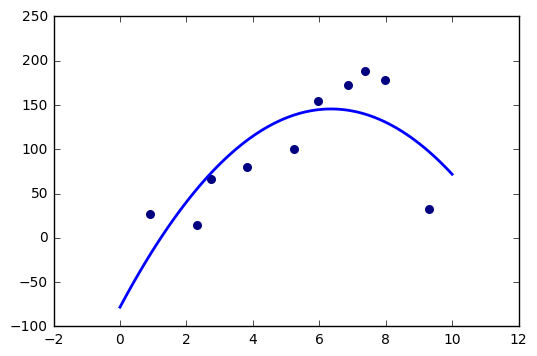

score Y=f(x, degree=3)= 0.910068046747


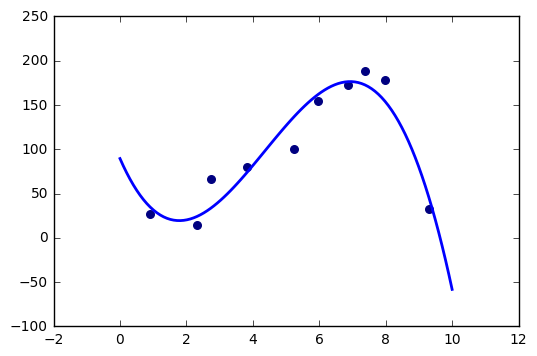

score Y=f(x, degree=4)= 0.957077942201


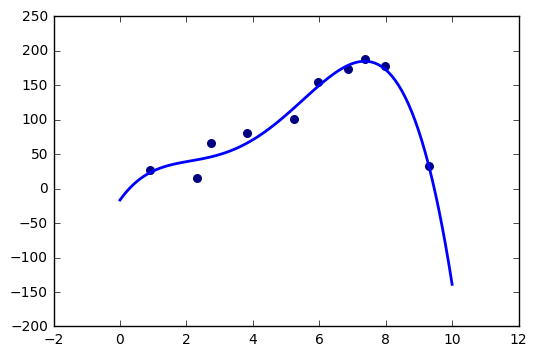

score Y=f(x, degree=5)= 0.968013884197


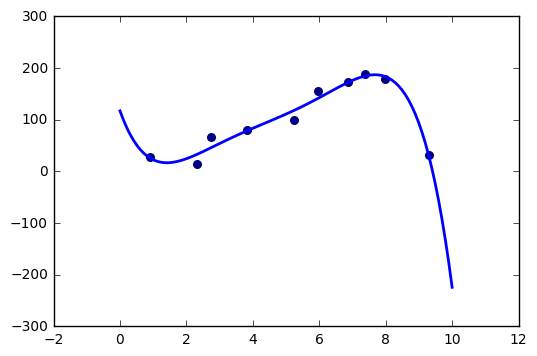

score Y=f(x, degree=6)= 0.980304038772


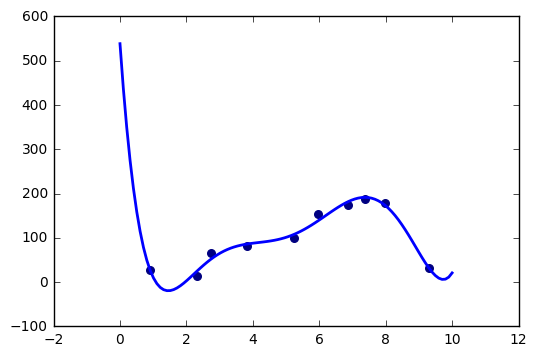

score Y=f(x, degree=7)= 0.996264767461


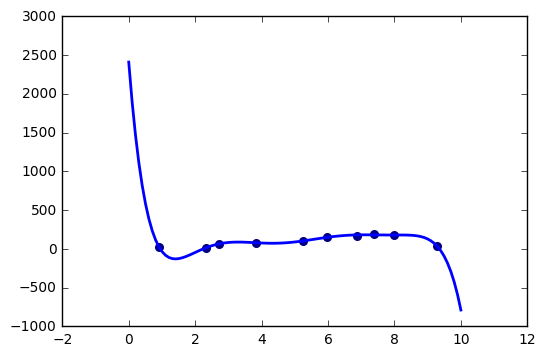

In [7]:
## 1次元の線形回帰
# create matrix versions of these arrays
X = x[:, np.newaxis]

for degree in range(2, 8):
    ## 高次元の特徴量を追加する。
    reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    reg.fit(X, y)
    
    print("score Y=f(x, degree={0})=".format(degree), reg.score(X, y))
    
    ## Plot
    plt.clf()
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

    y_plot = reg.predict(X_plot)
    plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

    plt.show()

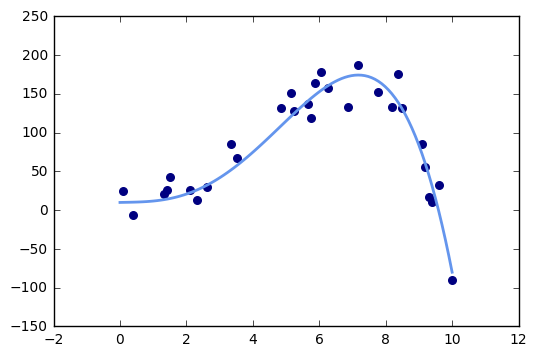

In [11]:
## データを作った関数
def f(x):
    return 10 + x - x ** 2 + 2 * x**3 - 0.2 * x**4

x = np.linspace(0, 10, 100)
rng = np.random.RandomState(232)
rng.shuffle(x)
x = np.sort(x[:30])
y = f(x) + np.random.normal(loc=0, scale=20, size=30)

plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

plt.show()